In [509]:
import numpy as np
import matplotlib.pyplot as plt
import sep
from matplotlib import rcParams
from astropy.io import fits
import scipy
import matplotlib.colors as colors
from scipy.stats import norm
import matplotlib.mlab as mlab

In [510]:
#setting the figure size
rcParams['figure.figsize']=[10., 8.]

In [511]:
#settugn data equal to the datat that is in file
data = astropy.io.fits.open('hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits')

#gets the data from the image in a numpy array
image_data = fits.getdata('hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits')
print(type(image_data))
print(image_data.shape)
#fixes error that was popping up when trying to run the code from the tutorial, sujested by jupyter
image_data = image_data.byteswap().newbyteorder()


data.close()


<class 'numpy.ndarray'>
(3600, 3600)


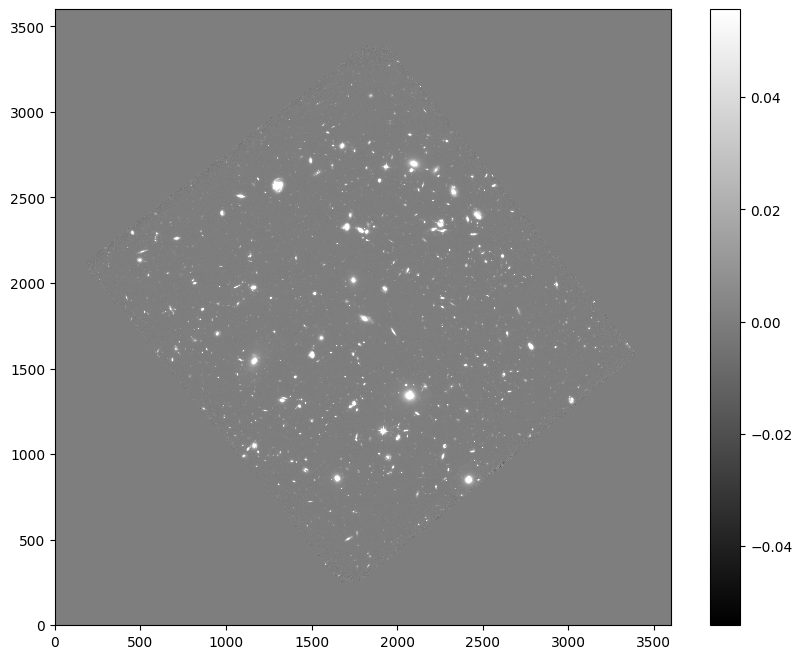

In [512]:
#sets m = to mean of image data and s equal to the standard deviation
m, s = np.mean(image_data), np.std(image_data)
#showing the image 
plt.imshow(image_data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar()
plt.savefig("one.png",bbox_inches = 'tight', dpi = 600)

In [513]:
bkg = sep.Background(image_data)

In [514]:
print(bkg.globalback)
print(bkg.globalrms)

0.0
0.0005398219218477607


In [515]:
bkg_image = bkg.back()

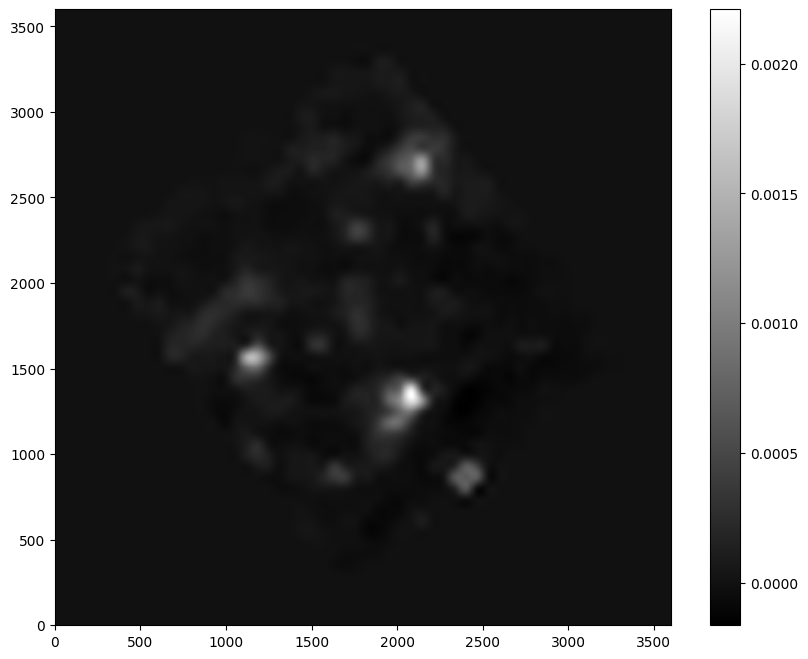

In [516]:
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig("two.png",bbox_inches = 'tight', dpi = 600)

In [517]:
bkg_rms = bkg.rms()

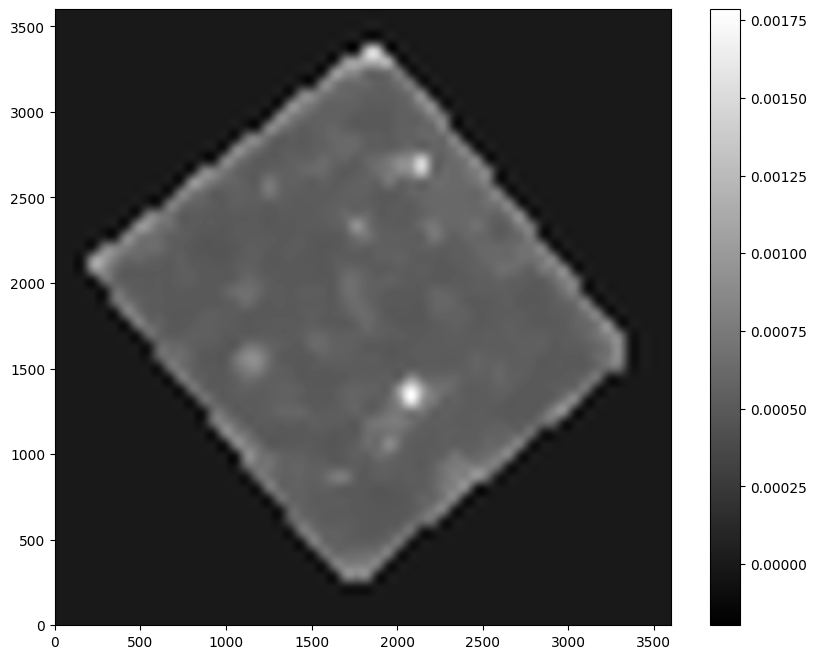

In [518]:
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig("three.png",bbox_inches = 'tight', dpi = 600)

In [519]:
data_sub = image_data - bkg

In [520]:
objects = sep.extract(data_sub, 15, err=bkg.globalrms)

In [521]:
#how many objkects were detected
len(objects)

1158

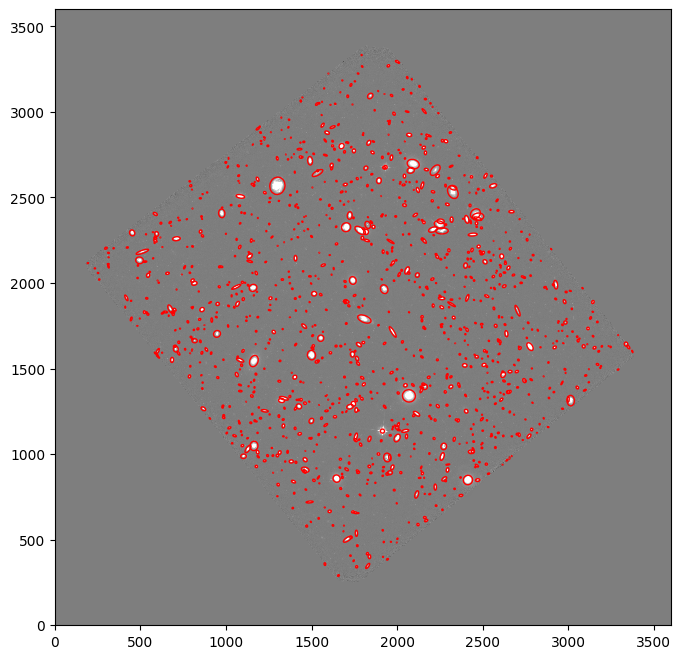

In [522]:
from matplotlib.patches import Ellipse

#plot background- subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap = 'grey', vmin = m-s, vmax = m+s, origin = 'lower')

#plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy = (objects['x'][i], objects['y'][i]), width=6*objects['a'][i], height = 6*objects['b'][i], angle=objects['theta'][i] * 180. / np.pi)

    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

plt.savefig("four.png",bbox_inches = 'tight', dpi = 600)



In [523]:
#availible fields
objects.dtype.names


('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

In [524]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'], 3.0, err=bkg.globalrms, gain =1.0)

In [525]:
flux, fluxerr, flag = sep.sum_circle(image_data, objects['x'], objects['y'], 3.0, err=bkg.globalrms, gain =1.0)

In [526]:
#show the objects results:
for i in range(1158):
    print('object {:d}: flux = {:f} +/- {:f}'.format(i, flux[i], fluxerr[i]))
          

object 0: flux = 1.153044 +/- 1.073803
object 1: flux = 0.552822 +/- 0.743525
object 2: flux = 1.125141 +/- 1.060731
object 3: flux = 0.874769 +/- 0.935295
object 4: flux = 0.287929 +/- 0.536598
object 5: flux = 0.693633 +/- 0.832851
object 6: flux = 0.214234 +/- 0.462863
object 7: flux = 0.496705 +/- 0.704779
object 8: flux = 0.748004 +/- 0.864877
object 9: flux = 1.254526 +/- 1.120060
object 10: flux = 0.969157 +/- 0.984462
object 11: flux = 0.165982 +/- 0.407419
object 12: flux = 0.326247 +/- 0.571188
object 13: flux = 0.235945 +/- 0.485751
object 14: flux = 0.267232 +/- 0.516953
object 15: flux = 3.217997 +/- 1.793880
object 16: flux = 0.863798 +/- 0.929412
object 17: flux = 0.207184 +/- 0.455184
object 18: flux = 1.057390 +/- 1.028299
object 19: flux = 0.414279 +/- 0.643651
object 20: flux = 0.197490 +/- 0.444408
object 21: flux = 1.422193 +/- 1.192561
object 22: flux = 0.672712 +/- 0.820195
object 23: flux = 2.250252 +/- 1.500087
object 24: flux = 0.208202 +/- 0.456301
object 25:

In [527]:
def gaussian(x, mu, s):
    return 1./(2.*np.pi*s**2)**0.5 * np.exp(-0.5*((x-mu)/s)**2)

The largest outlier in the distribution has a flux value of aproximately 804.8353611183165 and is 32.09167453748892 deviations away from the mean
 The mean is 2.488025021324237, the standard deviation is 25.079257244059427, and the median is 0.46786732833832506


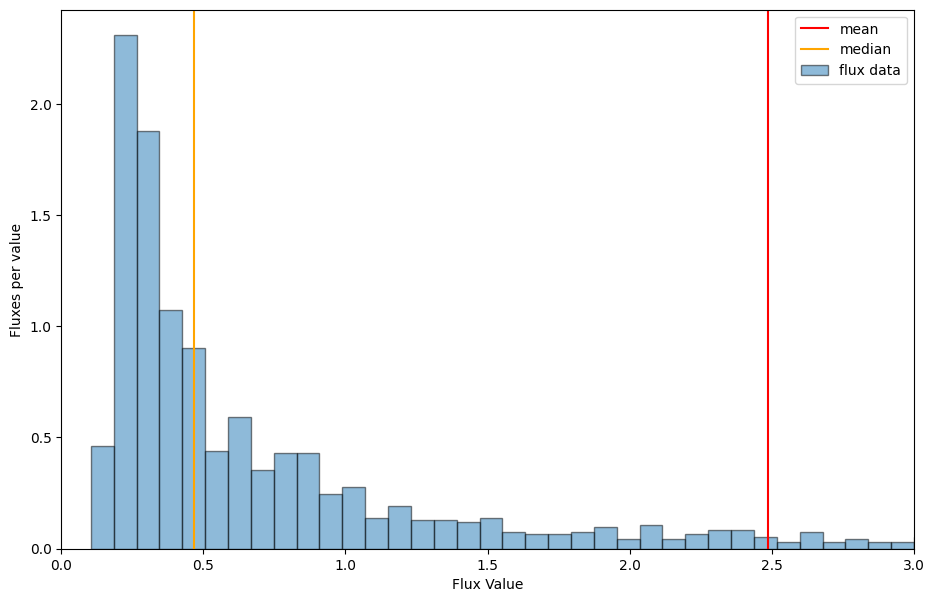

In [575]:
mean = np.mean(flux)
std = np.std(flux)

h = std * 3
t = np.median(flux)


v = np.max(flux)

answer = v/std


print(f'The largest outlier in the distribution has a flux value of aproximately {v} and is {answer} deviations away from the mean')

print(f' The mean is {mean}, the standard deviation is {std}, and the median is {t}')

plt.figure(figsize = (11,7))

plt.xlim([0,3])


plt.axvline(mean, color ='red', label = 'mean')
plt.axvline(t, color = 'orange', label = 'median')
            
plt.xlabel('Flux Value')
plt.ylabel('Fluxes per value')
plt.hist(flux, bins = 10000, alpha = 0.5, edgecolor = 'black', label = 'flux data', density = True)
plt.show
plt.legend()



In [529]:
d = fits.open('hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits')
d = d[0].data


In [530]:
e = fits.open('hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits')
e = e[0].data

In [535]:
k = fits.open('hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits')
k = k[0].data

/var/folders/ct/bxrxkcmj2hg1gdxc79s29m600000gn/T/ipykernel_22971/3797778483.py:1: RuntimeWarning: divide by zero encountered in log10
  d_log = np.log10(d)
/var/folders/ct/bxrxkcmj2hg1gdxc79s29m600000gn/T/ipykernel_22971/3797778483.py:1: RuntimeWarning: invalid value encountered in log10
  d_log = np.log10(d)


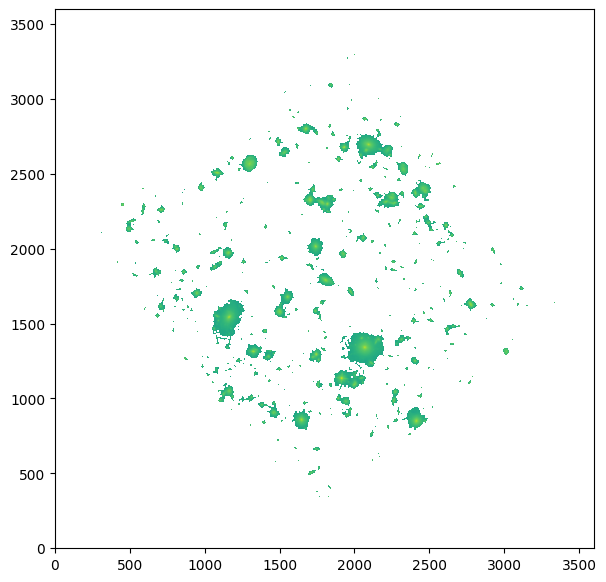

In [536]:
d_log = np.log10(d)
f=plt.figure(figsize=(7,7))
plt.imshow(d_log,origin='lower')

/var/folders/ct/bxrxkcmj2hg1gdxc79s29m600000gn/T/ipykernel_22971/3490996737.py:1: RuntimeWarning: divide by zero encountered in log10
  e_log = np.log10(e)
/var/folders/ct/bxrxkcmj2hg1gdxc79s29m600000gn/T/ipykernel_22971/3490996737.py:1: RuntimeWarning: invalid value encountered in log10
  e_log = np.log10(e)


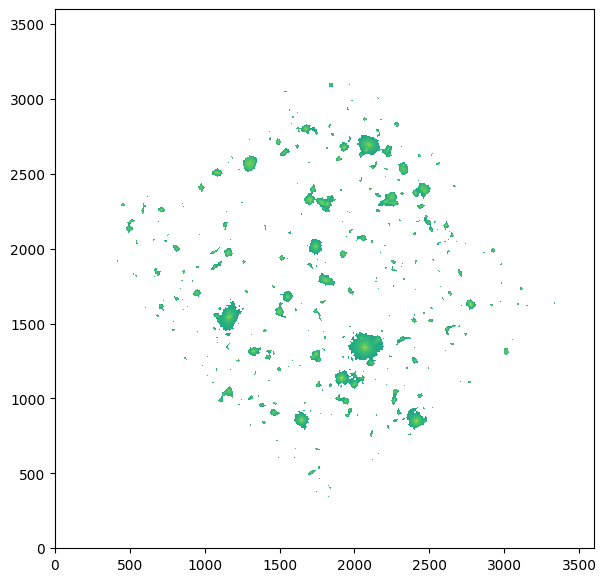

In [537]:
e_log = np.log10(e)
f=plt.figure(figsize=(7,7))
plt.imshow(e_log,origin='lower')

/var/folders/ct/bxrxkcmj2hg1gdxc79s29m600000gn/T/ipykernel_22971/1412510620.py:1: RuntimeWarning: divide by zero encountered in log10
  k_log = np.log10(k)
/var/folders/ct/bxrxkcmj2hg1gdxc79s29m600000gn/T/ipykernel_22971/1412510620.py:1: RuntimeWarning: invalid value encountered in log10
  k_log = np.log10(k)


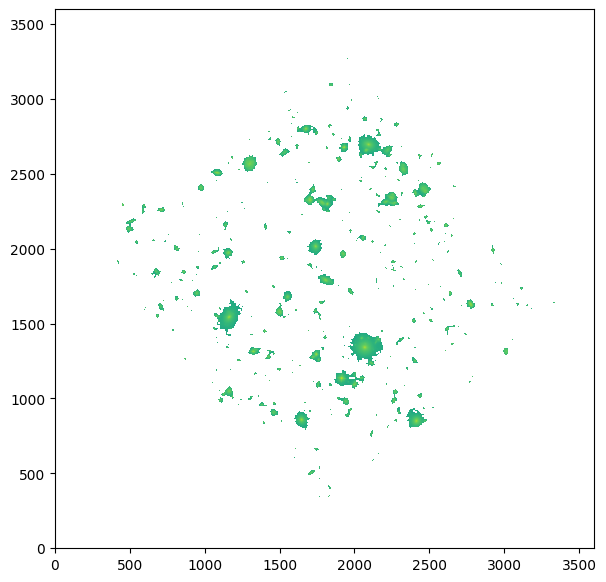

In [538]:
k_log = np.log10(k)
f=plt.figure(figsize=(7,7))
plt.imshow(k_log,origin='lower')

In [540]:
d_min = d_log.min()
d_max = d_log.max()


v = (d_log - d_min)/(d_max-d_min)
s = 1.0 - v

In [541]:
e_min = e_log.min()
e_max = e_log.max()


h = 0.1*(e_log - e_min)/(e_max - e_min)

In [542]:
hsv_image= np.zeros((3600,3600,3))

hsv_image[:,:,0] = h
hsv_image[:,:,1] = s 
hsv_image[:,:,2] = v

rgb = colors.hsv_to_rgb(hsv_image)

In [553]:
image = np.stack([d, e, k], axis = 0 )
image = image.transpose(1, 2, 0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


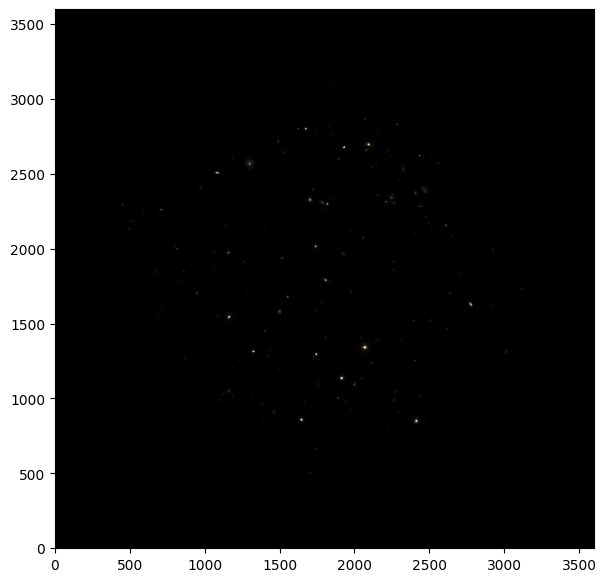

In [555]:
f = plt.figure(figsize=(7,7))
plt.imshow(image, origin='lower')
plt.savefig("3_color.png", bbox_inches = 'tight', dpi = 600)